In [1]:
import pandas as pd

In [2]:
import yfinance as yf
df = yf.download('^KS11')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-28,2616.270020,2655.280029,2611.719971,2655.280029,2655.280029,460100
2024-01-02,2645.469971,2675.800049,2641.879883,2669.810059,2669.810059,409900
2024-01-03,2643.540039,2643.719971,2607.310059,2607.310059,2607.310059,463100
2024-01-04,2592.439941,2602.639893,2580.090088,2587.020020,2587.020020,770200
2024-01-05,2586.889893,2592.290039,2572.600098,2578.080078,2578.080078,520500


In [5]:
#전체 기간 수익률

from pykrx import stock
df_all = stock.get_index_ohlcv_by_date("1996","2024",'1001')
df_all = df_all.sort_index()
df_all

# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
1996-01-03,882.29,889.59,880.45,888.85,9485720,206554000000,0
1996-01-04,888.60,890.87,859.97,859.97,18279310,392339000000,0
1996-01-05,858.84,858.84,844.04,856.62,18781550,334469000000,0
1996-01-06,856.49,862.64,856.49,858.36,12743550,224323000000,0
1996-01-08,857.49,876.10,850.67,866.81,22035590,361553000000,0
...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,9467808991589,2080482827882262
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,8848287882829,2082855844704432
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,9582765574870,2085608165140366


In [6]:
returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
print((returns-1)*100)

196.531752598352


In [7]:
#연복리 수익률
diff = (df_all.index[-1]-df_all.index[0])
periods = diff.days/365 
cagr = returns ** (1/periods)-1
print(cagr)

0.039580288777033346


In [8]:
df_all

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
1996-01-03,882.29,889.59,880.45,888.85,9485720,206554000000,0
1996-01-04,888.60,890.87,859.97,859.97,18279310,392339000000,0
1996-01-05,858.84,858.84,844.04,856.62,18781550,334469000000,0
1996-01-06,856.49,862.64,856.49,858.36,12743550,224323000000,0
1996-01-08,857.49,876.10,850.67,866.81,22035590,361553000000,0
...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,9467808991589,2080482827882262
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,8848287882829,2082855844704432
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,9582765574870,2085608165140366


<Axes: xlabel='1996-2024'>

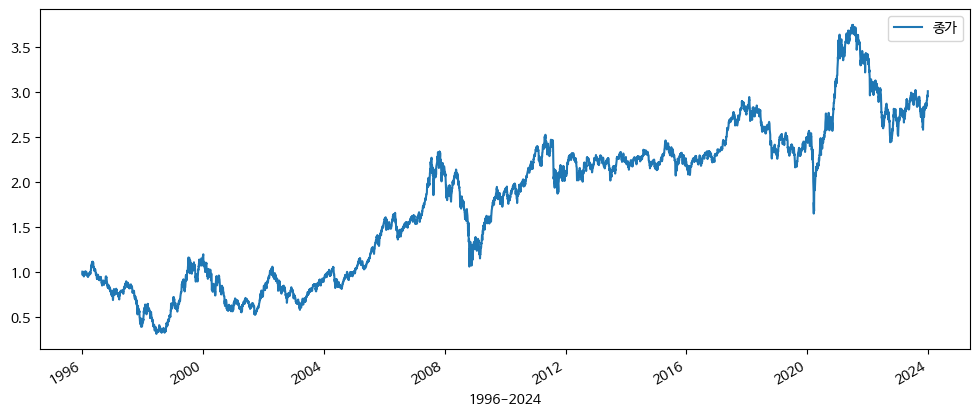

In [9]:
import pandas as pd
df_all_returns = df_all['종가']/df_all.iloc[0,0]

df_all = pd.DataFrame(df_all_returns)
df_all.index.name="1996-2024"
df_all.plot(figsize=(12,5))

In [10]:
#2020-2024
import yfinance as yf
df_yf = yf.download('^KS11')
df_yf

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600
...,...,...,...,...,...,...
2023-12-28,2616.270020,2655.280029,2611.719971,2655.280029,2655.280029,460100
2024-01-02,2645.469971,2675.800049,2641.879883,2669.810059,2669.810059,409900
2024-01-03,2643.540039,2643.719971,2607.310059,2607.310059,2607.310059,463100


In [11]:
df_yf.loc['1999-12']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-01,992.619995,1007.289978,984.380005,999.159973,999.159973,294800
1999-12-02,1008.549988,1013.840027,959.840027,967.900024,967.900024,305600
1999-12-03,973.849976,982.190002,955.380005,966.590027,966.590027,259400
1999-12-06,978.359985,999.770020,971.599976,998.109985,998.109985,258400
1999-12-07,1001.359985,1009.739990,984.630005,999.919983,999.919983,285500
1999-12-08,992.289978,998.159973,974.789978,988.320007,988.320007,277900
1999-12-09,982.890015,995.710022,976.679993,980.539978,980.539978,329800
1999-12-10,989.969971,1019.489990,982.780029,1018.169983,1018.169983,394000
1999-12-13,1030.660034,1036.560059,1013.650024,1013.650024,1013.650024,354400


In [18]:
import yfinance as yf
df_yf_20 = stock.get_index_ohlcv_by_date("1999-12-28","2023-01-05","1001","d")
df_yf_20 = df_yf_20.sort_index()

df_yf_20 = df_yf.loc["1999-12-28":"2023-01-01"]
df_yf_20




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-28,1010.409973,1038.040039,1004.210022,1028.069946,1028.069946,259800
2000-01-04,1028.329956,1066.180054,1016.590027,1059.040039,1059.040039,195900
2000-01-05,1006.869995,1026.520020,984.049988,986.309998,986.309998,257700
2000-01-06,1013.950012,1014.900024,953.500000,960.789978,960.789978,203500
2000-01-07,949.169983,970.159973,930.840027,948.650024,948.650024,215700
...,...,...,...,...,...,...
2022-12-23,2325.860107,2333.080078,2311.899902,2313.689941,2313.689941,367000
2022-12-26,2312.540039,2321.919922,2304.199951,2317.139893,2317.139893,427600
2022-12-27,2327.520020,2335.989990,2321.479980,2332.790039,2332.790039,448300


In [13]:
#2000-2023

df_yf_20 = pd.DataFrame(df_yf_20)
daily_simple_returns20 = df_yf_20.pct_change()


daily_simple_returns20
# annualized_returns22 = daily_simple_returns22.mean()*252
# annualized_returns22



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,0.017735,0.027109,0.012328,0.030124,0.030124,-0.245958
2000-01-05,-0.020869,-0.037198,-0.032009,-0.068675,-0.068675,0.315467
2000-01-06,0.007032,-0.011320,-0.031045,-0.025874,-0.025874,-0.210322
2000-01-07,-0.063889,-0.044083,-0.023765,-0.012635,-0.012635,0.059951
...,...,...,...,...,...,...
2022-12-23,-0.006043,-0.010035,-0.010211,-0.018263,-0.018263,-0.336107
2022-12-26,-0.005727,-0.004783,-0.003331,0.001491,0.001491,0.165123
2022-12-27,0.006478,0.006060,0.007499,0.006754,0.006754,0.048410


In [14]:
return_20_24 = df_yf_20.iloc[-1,0]/df_yf_20.iloc[0,0]
print((return_20_24-1)*100)

124.23867941618734


In [15]:
#연복리 수익률(20-24)
diff = (df_yf_20.index[-1]-df_yf_20.index[0])
periods = diff.days/365 
cagr_20_24 = returns ** (1/periods)-1
print(cagr_20_24)

0.04835346514989358


<Axes: xlabel='2020-2024'>

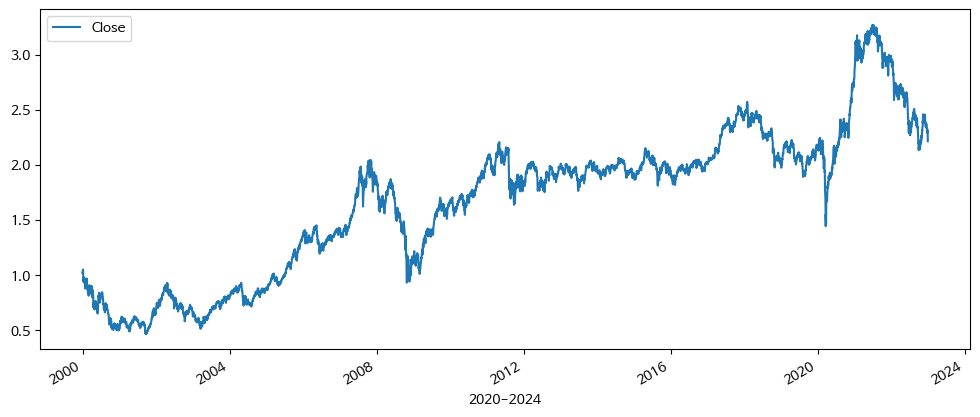

In [16]:
import pandas as pd
df_yf_20_returns = df_yf_20['Close']/df_yf_20.iloc[0,0]

df_yf_20 = pd.DataFrame(df_yf_20_returns)
df_yf_20.index.name="2020-2024"
df_yf_20.plot(figsize=(12,5))

NameError: name 'df_bond' is not defined

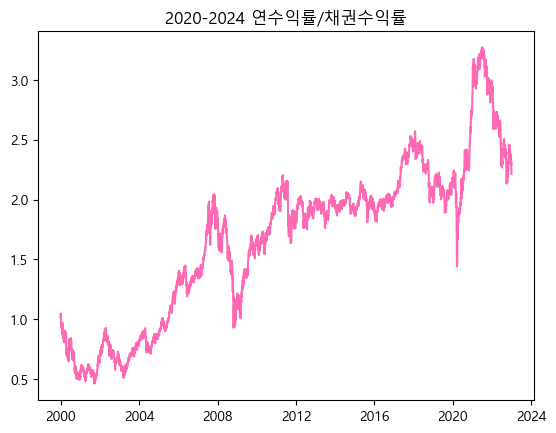

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.title('2020-2024 연수익률/채권수익률')
plt.plot(df_yf_20, label='연수익률',color='hotpink')
plt.plot(df_bond, label='채권수익률',color='royalblue')
plt.legend()
plt.show()

In [ ]:
from pykrx import bond
from pykrx import stock

dfbond = bond.get_otc_treasury_yields("20240102")
print(dfbond)


                      수익률     대비
채권종류                            
국고채 1년              3.466  0.032
국고채 2년              3.331  0.069
국고채 3년              3.240  0.086
국고채 5년              3.266  0.110
국고채 10년             3.306  0.123
국고채 20년             3.243  0.132
국고채 30년             3.228  0.140
국민주택 1종 5년          3.531  0.088
회사채 AA-(무보증 3년)     3.980  0.082
회사채 BBB- (무보증 3년)  10.427  0.085
CD(91일)             3.830  0.000


              수익률     대비
일자                      
2020-01-02  1.327 -0.033
2020-01-03  1.270 -0.057
2020-01-06  1.277  0.007
2020-01-07  1.331  0.054
2020-01-08  1.363  0.032


<Axes: xlabel='2020-2024_10yrkbond'>

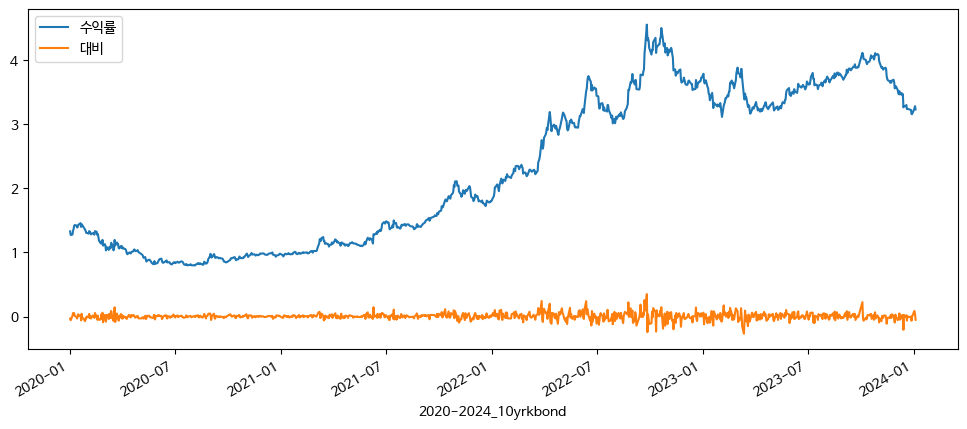

In [ ]:
df_bond = bond.get_otc_treasury_yields("20200101", "20240104", "국고채3년")
print(df_bond.head())

df_bond = pd.DataFrame(df_bond)
df_bond.index.name="2020-2024_10yrkbond"
df_bond.plot(figsize=(12,5))

                       수익률     대비
2020-2024_10yrkbond              
2020-01-02           1.327 -0.033
2020-01-03           1.270 -0.057
2020-01-06           1.277  0.007
2020-01-07           1.331  0.054
2020-01-08           1.363  0.032


<Axes: xlabel='10yrkbond'>

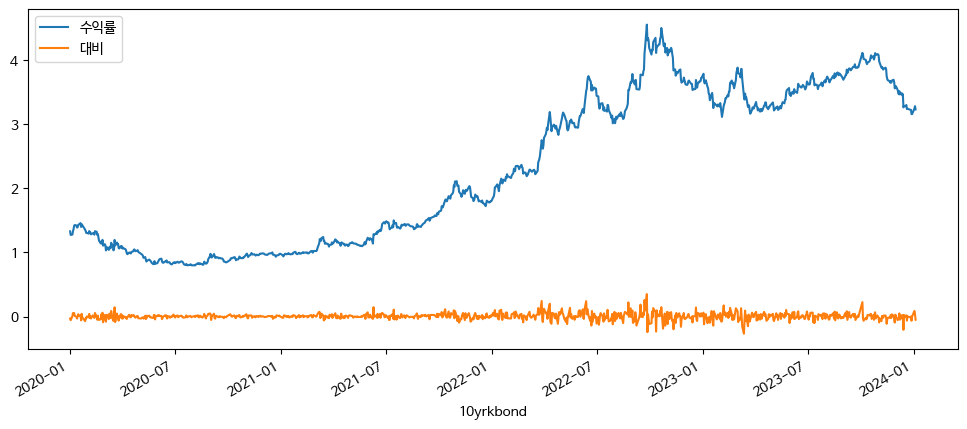

In [ ]:
df_bond10 = bond.get_otc_treasury_yields("20100101", "20240104", "국고채10년")
print(df_bond.head())

df_bond10 = pd.DataFrame(df_bond)
df_bond10.index.name="10yrkbond"
df_bond10.plot(figsize=(12,5))

In [ ]:
df_bond = bond.get_otc_treasury_yields("20230103")
print(df_bond)

                      수익률     대비
채권종류                            
국고채 1년              3.705 -0.064
국고채 2년              3.733 -0.115
국고채 3년              3.661 -0.121
국고채 5년              3.674 -0.135
국고채 10년             3.661 -0.150
국고채 20년             3.654 -0.091
국고채 30년             3.657 -0.076
국민주택 1종 5년          3.995 -0.131
회사채 AA-(무보증 3년)     5.131 -0.131
회사채 BBB- (무보증 3년)  11.088 -0.113
CD(91일)             3.960 -0.020


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-11,705.989990,709.479980,704.429993,704.679993,704.679993,28000
1996-12-12,705.109985,706.010010,688.739990,689.380005,689.380005,25900
1996-12-13,690.440002,695.719971,677.640015,689.070007,689.070007,26500
1996-12-16,686.969971,686.969971,667.710022,673.919983,673.919983,22800
1996-12-17,675.349976,680.090027,660.390015,663.349976,663.349976,31600


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-28,2616.270020,2655.280029,2611.719971,2655.280029,2655.280029,460100
2024-01-02,2645.469971,2675.800049,2641.879883,2669.810059,2669.810059,409900
2024-01-03,2643.540039,2643.719971,2607.310059,2607.310059,2607.310059,463100
2024-01-04,2592.439941,2602.639893,2580.090088,2587.020020,2587.020020,770200
2024-01-05,2586.889893,2592.290039,2582.219971,2583.739990,2583.739990,262883


In [ ]:
df.loc['2022-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,2991.969971,2995.250000,2973.080078,2989.239990,2989.239990,621200
2022-01-05,2984.050049,2986.199951,2936.729980,2953.969971,2953.969971,786900
2022-01-06,2925.399902,2952.540039,2915.379883,2920.530029,2920.530029,785500
2022-01-07,2933.780029,2959.030029,2933.100098,2954.889893,2954.889893,545800
2022-01-10,2947.370117,2951.120117,2910.899902,2926.719971,2926.719971,477000
2022-01-11,2930.929932,2943.570068,2909.820068,2927.379883,2927.379883,565800
2022-01-12,2950.780029,2972.580078,2950.310059,2972.479980,2972.479980,519000
2022-01-13,2979.909912,2982.139893,2958.389893,2962.090088,2962.090088,604600
2022-01-14,2937.610107,2944.969971,2914.729980,2921.919922,2921.919922,532300


In [ ]:
df_yf_2324 = df_yf.loc["2022-12-29":"2024-01-01"]
df_yf_2324.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-29,2265.729980,2272.669922,2236.379883,2236.399902,2236.399902,361000
2023-01-02,2249.949951,2259.879883,2222.370117,2225.669922,2225.669922,346100
2023-01-03,2230.979980,2230.979980,2180.669922,2218.679932,2218.679932,410000
2023-01-04,2205.979980,2260.060059,2198.820068,2255.979980,2255.979980,412700
2023-01-05,2268.199951,2281.389893,2252.969971,2264.649902,2264.649902,430800


In [ ]:
#2023-2024
import yfinance as yf
df_yf_2324 = stock.get_index_ohlcv_by_date("2023","2024", "1001")
df_yf_2324 = df_yf_2324.sort_index()
df_yf_2324 = df_yf_2324['종가']
df_yf_2324
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_2324 = pd.DataFrame(df_yf_2324)
daily_simple_returns23 = df_yf_2324.pct_change()
annualized_returns23 = daily_simple_returns23.mean()*252
annualized_returns23

종가    0.194117
dtype: float64

In [ ]:
#2022-2023

import yfinance as yf
df_yf_2223 = stock.get_index_ohlcv_by_date("2022","2023", "1001")
df_yf_2223 = df_yf_2223.sort_index()
df_yf_2223 = df_yf_2223['종가']
df_yf_2223
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_2223 = pd.DataFrame(df_yf_2223)
daily_simple_returns22 = df_yf_2223.pct_change()
annualized_returns22 = daily_simple_returns22.mean()*252
annualized_returns22

종가   -0.280768
dtype: float64

In [ ]:
df_yf_2223 = pd.DataFrame(df_yf_2223)

In [ ]:
daily_simple_returns22 = df_yf_2223.pct_change()

In [ ]:
annualized_returns22 = daily_simple_returns22.mean()*252

In [ ]:
annualized_returns22

종가   -0.280768
dtype: float64

In [ ]:
#2021-2022

df_yf_2122 = stock.get_index_ohlcv_by_date("2021","2022", "")
df_yf_2122 = df_yf_2122.sort_index()
df_yf_2122 = df_yf_2122['종가']
df_yf_2122
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_2122 = pd.DataFrame(df_yf_2122)
daily_simple_returns21 = df_yf_2122.pct_change()
annualized_returns21 = daily_simple_returns21.mean()*252
annualized_returns21

종가    0.024549
dtype: float64

In [ ]:
#2020-2021

df_yf_2021 = stock.get_index_ohlcv_by_date("2020","2021", "1001")
df_yf_2021 = df_yf_2021.sort_index()
df_yf_2021 = df_yf_2021['종가']
df_yf_2021
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_2021 = pd.DataFrame(df_yf_2021)
daily_simple_returns20 = df_yf_2021.pct_change()
annualized_returns20 = daily_simple_returns21.mean()*252
annualized_returns20

종가    0.024549
dtype: float64

In [ ]:
#2019-2020

df_yf_1920 = stock.get_index_ohlcv_by_date("2019","2020", "1001")
df_yf_1920 = df_yf_1920.sort_index()
df_yf_1920 = df_yf_1920['종가']
df_yf_1920
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1920 = pd.DataFrame(df_yf_1920)
daily_simple_returns19 = df_yf_1920.pct_change()
annualized_returns19 = daily_simple_returns19.mean()*252
annualized_returns19

종가    0.099609
dtype: float64

In [ ]:
#2018-2019

df_yf_1819 = stock.get_index_ohlcv_by_date("2018","2019", "1001")
df_yf_1819 = df_yf_1819.sort_index()
df_yf_1819 = df_yf_1819['종가']
df_yf_1819
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1819 = pd.DataFrame(df_yf_1819)
daily_simple_returns18 = df_yf_1819.pct_change()
annualized_returns18 = daily_simple_returns18.mean()*252
annualized_returns18

종가   -0.191436
dtype: float64

In [ ]:
#2017-2018

df_yf_1718 = stock.get_index_ohlcv_by_date("2017","2018", "1001")
df_yf_1718 = df_yf_1718.sort_index()
df_yf_1718 = df_yf_1718['종가']
df_yf_1718
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1718 = pd.DataFrame(df_yf_1718)
daily_simple_returns17 = df_yf_1718.pct_change()
annualized_returns17 = daily_simple_returns17.mean()*252
annualized_returns17

종가    0.209612
dtype: float64

In [ ]:
#2016-2017

df_yf_1617 = stock.get_index_ohlcv_by_date("2016","2017", "1001")
df_yf_1617 = df_yf_1617.sort_index()
df_yf_1617 = df_yf_1617['종가']
df_yf_1617
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1617 = pd.DataFrame(df_yf_1617)
daily_simple_returns16 = df_yf_1617.pct_change()
annualized_returns16 = daily_simple_returns16.mean()*252
annualized_returns16

종가    0.063414
dtype: float64

In [ ]:
df_yf_1516 = df_yf.loc["2014-12-30":"2016-01-01"]
df_yf_1516.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-30,1934.510010,1937.550049,1910.780029,1915.589966,1915.589966,256400
2015-01-02,1914.239990,1929.150024,1909.670044,1926.439941,1926.439941,258800
2015-01-05,1921.959961,1921.959961,1903.369995,1915.750000,1915.750000,313400
2015-01-06,1895.479980,1900.020020,1877.380005,1882.449951,1882.449951,303700
2015-01-07,1878.900024,1887.599976,1876.270020,1883.829956,1883.829956,280500


In [ ]:
#2015-2016

df_yf_1516 = stock.get_index_ohlcv_by_date("2015","2016", "1001")
df_yf_1516 = df_yf_1516.sort_index()
df_yf_1516 = df_yf_1516['종가']
df_yf_1516
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1516 = pd.DataFrame(df_yf_1516)
daily_simple_returns15 = df_yf_1516.pct_change()
annualized_returns15 = daily_simple_returns16.mean()*252
annualized_returns15

종가    0.063414
dtype: float64

In [ ]:
df_yf_1415 = df_yf.loc["2013-12-30":"2015-01-01"]
df_yf_1415.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-30,2004.319946,2011.339966,1998.609985,2011.339966,2011.339966,172200
2014-01-02,2013.109985,2013.890015,1967.189941,1967.189941,1967.189941,207800
2014-01-03,1963.719971,1964.630005,1936.150024,1946.140015,1946.140015,188500
2014-01-06,1947.619995,1961.849976,1943.739990,1953.280029,1953.280029,193600
2014-01-07,1947.650024,1965.739990,1947.079956,1959.439941,1959.439941,193000


In [ ]:
#2014-2015

df_yf_1415 = stock.get_index_ohlcv_by_date("2014","2015", "1001")
df_yf_1415 = df_yf_1415.sort_index()
df_yf_1415 = df_yf_1415['종가']
df_yf_1415
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1415 = pd.DataFrame(df_yf_1415)
daily_simple_returns14 = df_yf_1415.pct_change()
annualized_returns14 = daily_simple_returns16.mean()*252
annualized_returns14

종가    0.063414
dtype: float64

In [ ]:
#2013-2014

df_yf_1314 = stock.get_index_ohlcv_by_date("2013","2014", "1001")
df_yf_1314 = df_yf_1314.sort_index()
df_yf_1314 = df_yf_1314['종가']
df_yf_1314
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1314 = pd.DataFrame(df_yf_1314)
daily_simple_returns13 = df_yf_1314.pct_change()
annualized_returns13 = daily_simple_returns13.mean()*252
annualized_returns13

종가   -0.002583
dtype: float64

In [ ]:
#2012-2013

df_yf_1213 = stock.get_index_ohlcv_by_date("2012","2013", "1001")
df_yf_1213 = df_yf_1213.sort_index()
df_yf_1213 = df_yf_1213['종가']
df_yf_1213
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1213 = pd.DataFrame(df_yf_1213)
daily_simple_returns12 = df_yf_1213.pct_change()
annualized_returns12 = daily_simple_returns12.mean()*252
annualized_returns12

종가    0.10305
dtype: float64

In [ ]:
#2011-2012

df_yf_1112 = stock.get_index_ohlcv_by_date("2011","2012", "1001")
df_yf_1112 = df_yf_1112.sort_index()
df_yf_1112 = df_yf_1112['종가']
df_yf_1112
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1112 = pd.DataFrame(df_yf_1112)
daily_simple_returns11 = df_yf_1112.pct_change()
annualized_returns11 = daily_simple_returns12.mean()*252
annualized_returns11

종가    0.10305
dtype: float64

In [ ]:
#2010-2011

df_yf_1011 = stock.get_index_ohlcv_by_date("2010","2011", "1001")
df_yf_1011 = df_yf_1011.sort_index()
df_yf_1011 = df_yf_1011['종가']
df_yf_1011
# returns = df_all.iloc[-1,0]/df_all.iloc[0,0]
# print((returns-1)*100)

df_yf_1011 = pd.DataFrame(df_yf_1011)
daily_simple_returns10 = df_yf_1011.pct_change()
annualized_returns10 = daily_simple_returns10.mean()*252
annualized_returns10

종가    0.202853
dtype: float64

In [ ]:
annualized_returns10.values[0]

0.20285276833594998

In [ ]:
# 효진 코드 (수정 전)

annualized_returns_10yr = pd.DataFrame()
annualized_returns_10yr['year']=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
annualized_returns_10yr['Annualized_returns'] = [
    annualized_returns10,annualized_returns11,annualized_returns12,annualized_returns13, 
    annualized_returns14,annualized_returns15,annualized_returns16,annualized_returns17,
    annualized_returns18,annualized_returns19,annualized_returns20,annualized_returns21, 
    annualized_returns22,annualized_returns23
    ]
annualized_returns_10yr

,year,Annualized_returns
0,2010,종가 0.202853 dtype: float64
1,2011,종가 0.10305 dtype: float64
2,2012,종가 0.10305 dtype: float64
3,2013,종가 -0.002583 dtype: float64
4,2014,종가 0.063414 dtype: float64
5,2015,종가 0.063414 dtype: float64
6,2016,종가 0.063414 dtype: float64
7,2017,종가 0.209612 dtype: float64
8,2018,종가 -0.191436 dtype: float64
9,2019,종가 0.099609 dtype: float64


Text(0.5, 1.0, 'Annual Stock Returns for 10 years')

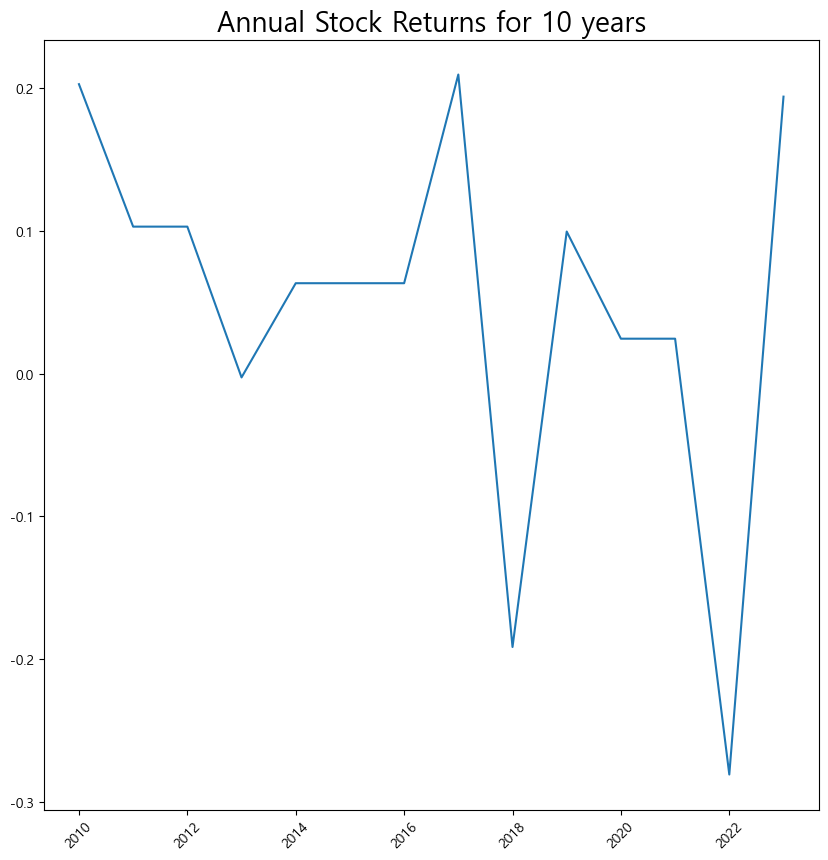

In [ ]:
#꺾은선 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(annualized_returns_10yr['year'], annualized_returns_10yr['Annualized_returns'])

plt.xticks(rotation=45)
plt.title('Annual Stock Returns for 10 years',fontsize=20)



              수익률     대비
일자                      
2020-01-02  1.319 -0.016
2020-01-03  1.299 -0.020
2020-01-06  1.295 -0.004
2020-01-07  1.312  0.017
2020-01-08  1.319  0.007


<Axes: xlabel='_1yrkbond'>

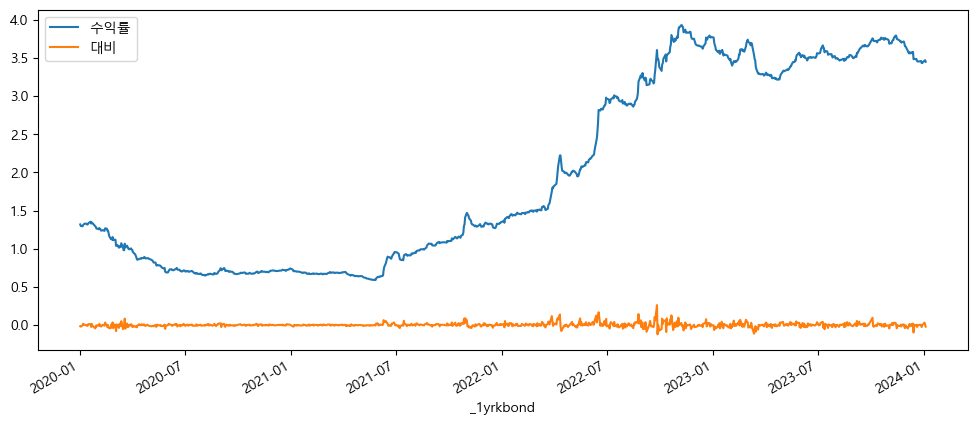

In [ ]:
df_bond = bond.get_otc_treasury_yields("20200101", "20240104", "국고채1년")
print(df_bond.head())

df_bond = pd.DataFrame(df_bond)
df_bond.index.name="_1yrkbond"
df_bond.plot(figsize=(12,5))

수정 후

In [ ]:
# 효진 코드 (수정 후)

annualized_returns_10yr = pd.DataFrame()
annualized_returns_10yr['year']=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
annualized_returns = [
    annualized_returns10,annualized_returns11,annualized_returns12,annualized_returns13, 
    annualized_returns14,annualized_returns15,annualized_returns16,annualized_returns17,
    annualized_returns18,annualized_returns19,annualized_returns20,annualized_returns21, 
    annualized_returns22,annualized_returns23
    ]

annualized_returns_10yr['Annualized_returns'] = list(map(lambda x: x.values[0], annualized_returns))
annualized_returns_10yr

,year,Annualized_returns
0,2010,0.202853
1,2011,0.103050
2,2012,0.103050
3,2013,-0.002583
4,2014,0.063414
5,2015,0.063414
6,2016,0.063414
7,2017,0.209612
8,2018,-0.191436
9,2019,0.099609


In [ ]:
annualized_returns_10yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                14 non-null     int64  
 1   Annualized_returns  14 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 356.0 bytes


In [ ]:
annualized_returns_10yr['Annualized_returns'][0]

0.20285276833594998

In [ ]:
annualized_returns_10yr

,year,Annualized_returns
0,2010,0.202853
1,2011,0.103050
2,2012,0.103050
3,2013,-0.002583
4,2014,0.063414
5,2015,0.063414
6,2016,0.063414
7,2017,0.209612
8,2018,-0.191436
9,2019,0.099609


In [ ]:
df_bond = df_bond.reset_index()
df_bond

,일자,수익률,대비,year,Annualized_returns_x,Annualized_returns_y
0,2010-01-04,4.440,0.030,2010,0.202853,0.202853
1,2010-01-05,4.360,-0.080,2010,0.202853,0.202853
2,2010-01-06,4.430,0.070,2010,0.202853,0.202853
3,2010-01-07,4.320,-0.110,2010,0.202853,0.202853
4,2010-01-08,4.360,0.040,2010,0.202853,0.202853
...,...,...,...,...,...,...
3465,2023-12-28,3.154,-0.066,2023,0.194117,0.194117
3466,2023-12-29,3.154,0.000,2023,0.194117,0.194117
3467,2024-01-02,3.240,0.086,2024,NaN,NaN
3468,2024-01-03,3.278,0.038,2024,NaN,NaN


In [ ]:
df_bond = pd.merge(df_bond, annualized_returns_10yr, how='left', on='year')
df_bond = df_bond.set_index('일자')
df_bond

,수익률,대비,year,Annualized_returns_x,Annualized_returns_y,Annualized_returns
일자,,,,,,
2010-01-04,4.440,0.030,2010,0.202853,0.202853,0.202853
2010-01-05,4.360,-0.080,2010,0.202853,0.202853,0.202853
2010-01-06,4.430,0.070,2010,0.202853,0.202853,0.202853
2010-01-07,4.320,-0.110,2010,0.202853,0.202853,0.202853
2010-01-08,4.360,0.040,2010,0.202853,0.202853,0.202853
...,...,...,...,...,...,...
2023-12-28,3.154,-0.066,2023,0.194117,0.194117,0.194117
2023-12-29,3.154,0.000,2023,0.194117,0.194117,0.194117
2024-01-02,3.240,0.086,2024,NaN,NaN,NaN


<Axes: xlabel='일자'>

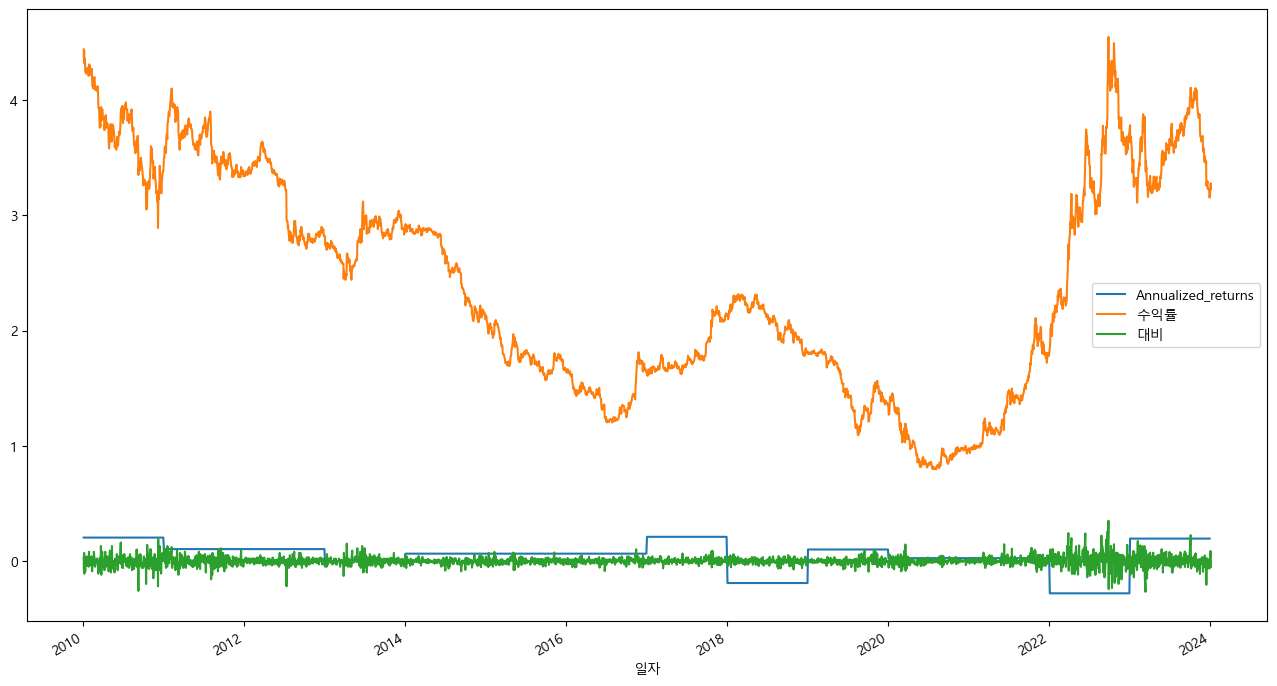

In [ ]:
df_bond[['Annualized_returns', '수익률', '대비']].plot(figsize=(16, 9))

In [ ]:
df_bond = bond.get_otc_treasury_yields("20100101", "20240104", "국고채3년")
# print(df_bond.head())

df_bond = pd.DataFrame(df_bond)
df_bond['year'] = df_bond.index.year
df_bond = pd.merge(df_bond, annualized_returns_10yr, how='left', on='year', left_index=True)
# df_bond.index.name="3yrkbond"
df_bond

MergeError: Can only pass argument "on" OR "left_index" and "right_index", not a combination of both.

In [ ]:
# #꺾은선 그래프 그리기
# import matplotlib.pyplot as plt
# %matplotlib inline

# fig = plt.figure(figsize=(10,10))
# fig.set_facecolor('white')
# ax = fig.add_subplot()
# # ax.plot(annualized_returns_10yr['year'], annualized_returns_10yr['Annualized_returns'])

# plt.xticks(rotation=45)
# plt.title('Annual Stock Returns for 10 years',fontsize=20)

# # ax.plot(df_bond.index, df_bond['Annualized_returns'])
# # ax.plot(df_bond.index, df_bond['수익률'])
# # ax.plot(df_bond.index, df_bond['대비'])
# # ax.legend(['annual returns', '수익률', '대비'])

# df_bond.plot(figsize=(12,5))
# plt.show()

             수익률    대비
일자                    
2010-01-04  4.44  0.03
2010-01-05  4.36 -0.08
2010-01-06  4.43  0.07
2010-01-07  4.32 -0.11
2010-01-08  4.36  0.04


<Axes: xlabel='3yrkbond'>

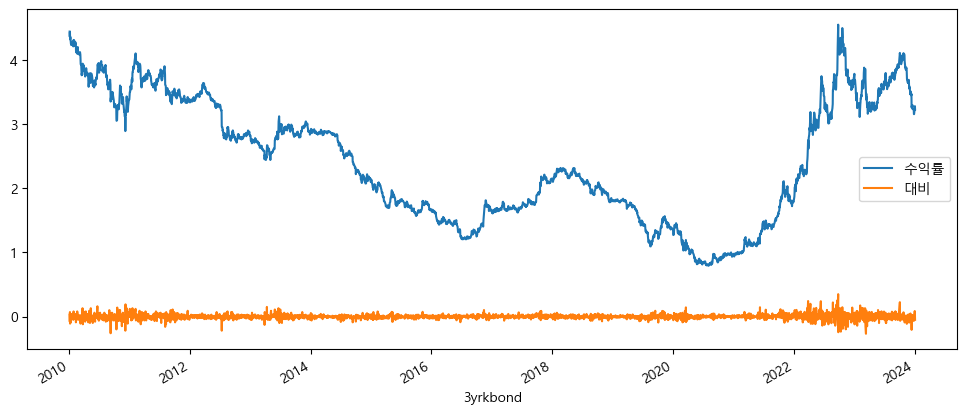

In [ ]:
df_bond = bond.get_otc_treasury_yields("20100101", "20240104", "국고채3년")
print(df_bond.head())

df_bond = pd.DataFrame(df_bond)
df_bond.index.name="3yrkbond"
df_bond.plot(figsize=(12,5))

In [ ]:
#한글폰트 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
import datetime
import requests
from bs4 import BeautifulSoup

In [ ]:
#코스피지수 ohlcv
kospi = stock.get_index_ohlcv('20100101','20240101','1001')
kospi

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,4364595613797,894731590862430
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,6830723338336,891901043372630
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,6391016648164,899645119495585
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,7498405146704,888111373913575
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,6965072761490,894080129850645
...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,9467808991589,2080482827882262
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,8848287882829,2082855844704432
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,9582765574870,2085608165140366


<Axes: xlabel='날짜'>

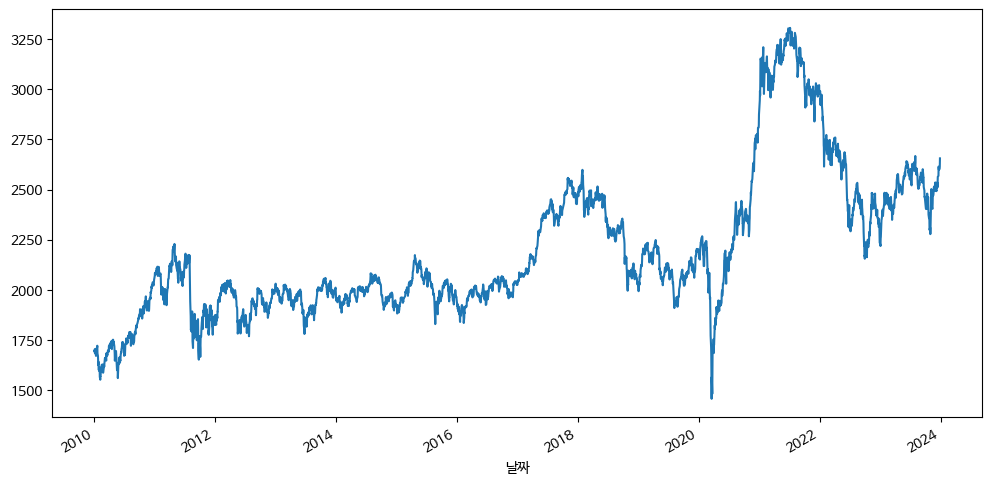

In [ ]:
#종가기준 plot
plt.figure(figsize=(12,6))
kospi['종가'].plot()

In [ ]:
#ECOS 데이터 호출함수
def EcosDownload(Statcode, Freq, Begdate,Enddate,Subcode1,Subcode2, Subcode3):
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/HA5OFFNUUGG4TD13CMHV/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)

    raw = requests.get(url)
    xml = BeautifulSoup(raw.text, 'xml')

    raw_data = xml.find_all('row')
    date_list=[]
    value_list=[]

    for item in raw_data:
            
        value = item.find('DATE_VALUE').text.encode('utf-8')
        date_str = item.find('TIME').text

        value = float(value)
        try:
            date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
        except:
            date_list.append(datetime.datetime.strptime(date_str,'%Y%m%d'))
    df = pd.DataFrame(index=date_list)
    df['value']=value_list

    return df 
                  

#### 날짜별로 상승장인지 하락장인지 확인하기

In [ ]:
#20년치 코스피 지수 ohlcv
kospi = stock.get_index_ohlcv("20100101", "20240101", "1001") 

In [ ]:
kospi

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,4364595613797,894731590862430
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,6830723338336,891901043372630
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,6391016648164,899645119495585
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,7498405146704,888111373913575
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,6965072761490,894080129850645
...,...,...,...,...,...,...,...
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,9467808991589,2080482827882262
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,8848287882829,2082855844704432
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,9582765574870,2085608165140366


In [ ]:
# ECOS 데이터 호출 함수
def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/HA5OFFNUUGG4TD13CMHV/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)

    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')

    raw_data = xml.find_all("row")

    date_list = []
    value_list = []

    for item in raw_data:
         
            value = item.find('DATA_VALUE').text.encode('utf-8')
            date_str = item.find('TIME').text
            
            value = float(value)
            try:
                date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
            except:
                date_list.append(datetime.datetime.strptime(date_str,'%Y%m%d'))
            value_list.append(value)
            
    df_1 = pd.DataFrame(index = date_list)
    
    df_1['value'] = value_list
      
    return df_1

In [ ]:
LEI=EcosDownload('901Y067', 'M', '201001', '202312', 'I16E', '', '') #경기 선행지수 순환변동치 데이터 load

In [ ]:
#시간단위를 맞추기 위해 월단위로 resampling
LEI = LEI.resample('1M').last()
kospi = kospi.resample('1M').last()

In [ ]:
df_1 = pd.merge(LEI, kospi, left_index=True, right_index=True, how='outer')

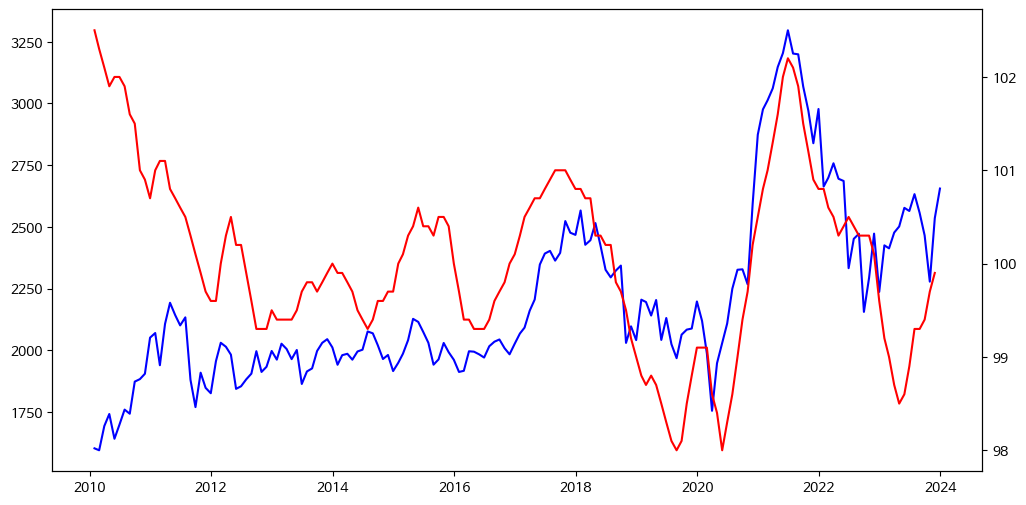

In [ ]:
plt.rcParams['figure.figsize']=(12,6)

fig,ax1 = plt.subplots()
ax1.plot(df_1.index, df_1['종가'],color='blue')

ax2=ax1.twinx()
ax2.plot(df_1.index,df_1['value'],color='red')

plt.show()

#경기선행지수(빨), 코스피지수(파)
#경기선행지수

#### 통화량과 코스피 지수 비교

In [ ]:
#20년치코스피지수
kospi = stock.get_index_ohlcv('20100101','20240101','1001')
#본원통화평잔데이터
M2=EcosDownload('101Y003', 'M', '201001', '202401', 'BBHS00', '','') 

In [ ]:
M2.columns=['M2']

In [ ]:
#시간단위맞추기위해 월단위로 resampling
M2 = M2.resample('1M').last()
kospi = kospi.resample('1M').last()

In [ ]:
df_2 = pd.merge(M2,kospi,left_index=True,right_index=True, how='outer')

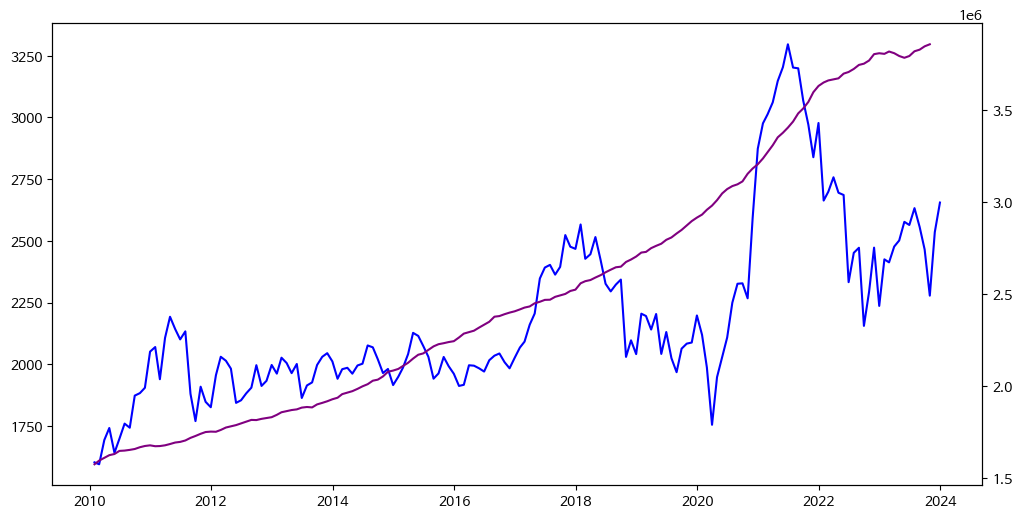

In [ ]:
plt.rcParams['figure.figsize']=(12,6)

fig,ax1 = plt.subplots()
ax1.plot(df_2.index,df_2['종가'],color='blue')

ax2 = ax1.twinx()
ax2.plot(df_2.index, df_2['M2'], color='purple')

plt.show()

#### 통화증가량 비교

In [ ]:
df_2['M2_gap'] = df_2['M2']-df_2['M2'].shift(1)

df_2 = df_2.dropna()

In [ ]:
plt.rcParams['figure.figsize']=(12,6)

fig,ax1 = plt.subplots()
ax1.plot(df_2.index, df_2['종가'],color='blue')

ax2=ax1.twinx()
a22.plot(df_2)